In [1]:
import os, shutil

original_dataset_dir = "../data/cat_vs_dog/train/"
base_dir = "small_cats_vs_dogs"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [13]:
os.mkdir(base_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs'

In [6]:
os.mkdir(train_dir)

In [8]:
os.mkdir(validation_dir)

In [10]:
os.mkdir(test_dir)

In [12]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/train/cats'

In [13]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/train/dogs'

In [14]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/validation/cats'

In [15]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/validation/dogs'

In [16]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/test/cats'

In [17]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

FileExistsError: [Errno 17] File exists: 'small_cats_vs_dogs/test/dogs'

In [17]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Sanity check

In [23]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Model

In [3]:
import os, shutil
from keras import layers
from keras.models import Sequential
from keras import optimizers

original_dataset_dir = "../data/cat_vs_dog/train/"
base_dir = "small_cats_vs_dogs"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:


model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras.optimizers import rmsprop
model.compile(optimizer=rmsprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

## Preprocess data

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(150,150),
                                                     batch_size=20, class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(validation_dir, target_size=(150,150),
                                                         batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [7]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 64s 638ms/step - loss: 0.6906 - acc: 0.5330 - val_loss: 0.6800 - val_acc: 0.5040
Epoch 2/30
100/100 [==============================] - 15s 147ms/step - loss: 0.6703 - acc: 0.5815 - val_loss: 0.6618 - val_acc: 0.5560
Epoch 3/30
100/100 [==============================] - 15s 148ms/step - loss: 0.6193 - acc: 0.6485 - val_loss: 0.6147 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 14s 144ms/step - loss: 0.5661 - acc: 0.7030 - val_loss: 0.6615 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 14s 145ms/step - loss: 0.5443 - acc: 0.7190 - val_loss: 0.5917 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 15s 145ms/step - loss: 0.5180 - acc: 0.7500 - val_loss: 0.5684 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 14s 145ms/step - loss: 0.4869 - acc: 0.7780 - val_loss: 0.5704 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 1

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


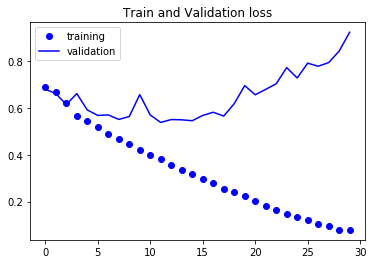

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'bo', label='training')
plt.plot(history.history['val_loss'], 'b', label='validation')
plt.title('Train and Validation loss')
plt.legend()
plt.show()

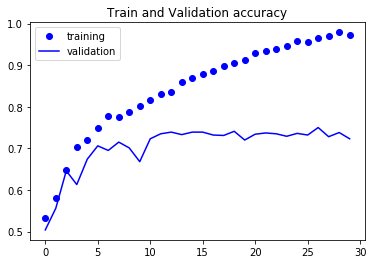

In [9]:
plt.plot(history.history['acc'], 'bo', label='training')
plt.plot(history.history['val_acc'], 'b', label='validation')
plt.title('Train and Validation accuracy')
plt.legend()
plt.show()

In [10]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')

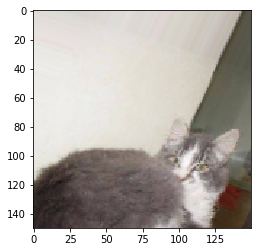

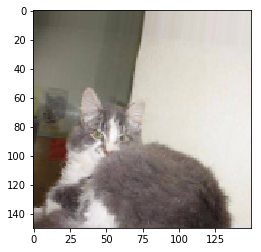

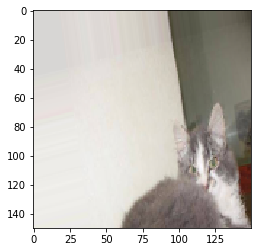

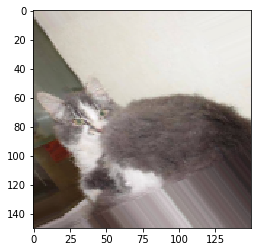

In [21]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4==0:
        break
plt.show()

In [22]:
train_data_gen = ImageDataGenerator(rescale=1/255., rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1/255.)

train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(150,150),
                                                     batch_size=32, class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(validation_dir, target_size=(150,150),
                                                         batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [24]:
model.compile(optimizer=rmsprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, 
                              validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 36s 360ms/step - loss: 0.6937 - acc: 0.5125 - val_loss: 0.6893 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 33s 328ms/step - loss: 0.6822 - acc: 0.5563 - val_loss: 0.6771 - val_acc: 0.5600
Epoch 3/100
100/100 [==============================] - 33s 333ms/step - loss: 0.6691 - acc: 0.5822 - val_loss: 0.6626 - val_acc: 0.5690
Epoch 4/100
100/100 [==============================] - 33s 325ms/step - loss: 0.6524 - acc: 0.6112 - val_loss: 0.6220 - val_acc: 0.6440
Epoch 5/100
100/100 [==============================] - 33s 330ms/step - loss: 0.6495 - acc: 0.6138 - val_loss: 0.6067 - val_acc: 0.6580
Epoch 6/100
100/100 [==============================] - 35s 355ms/step - loss: 0.6267 - acc: 0.6553 - val_loss: 0.6053 - val_acc: 0.6670
Epoch 7/100
100/100 [==============================] - 33s 325ms/step - loss: 0.6091 - acc: 0.6584 - val_loss: 0.5740 - val_acc: 0.6880
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 32s 323ms/step - loss: 0.4082 - acc: 0.8122 - val_loss: 0.5335 - val_acc: 0.7520
Epoch 62/100
100/100 [==============================] - 35s 352ms/step - loss: 0.4024 - acc: 0.8163 - val_loss: 0.4435 - val_acc: 0.8070
Epoch 63/100
100/100 [==============================] - 33s 329ms/step - loss: 0.4029 - acc: 0.8159 - val_loss: 0.4491 - val_acc: 0.8030
Epoch 64/100
100/100 [==============================] - 32s 324ms/step - loss: 0.4118 - acc: 0.8109 - val_loss: 0.5369 - val_acc: 0.7410
Epoch 65/100
100/100 [==============================] - 33s 328ms/step - loss: 0.4125 - acc: 0.8103 - val_loss: 0.4599 - val_acc: 0.7880
Epoch 66/100
100/100 [==============================] - 35s 348ms/step - loss: 0.4046 - acc: 0.8103 - val_loss: 0.4165 - val_acc: 0.8160
Epoch 67/100
100/100 [==============================] - 33s 328ms/step - loss: 0.3926 - acc: 0.8216 - val_loss: 0.4484 - val_acc: 0.8050
Epoch 68/100
100/100 [===================

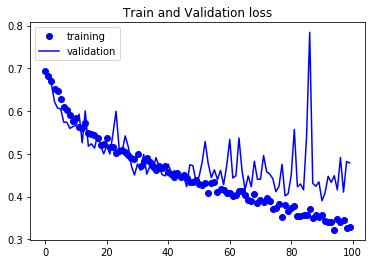

In [26]:
plt.plot(history.history['loss'], 'bo', label='training')
plt.plot(history.history['val_loss'], 'b', label='validation')
plt.title('Train and Validation loss')
plt.legend()
plt.show()

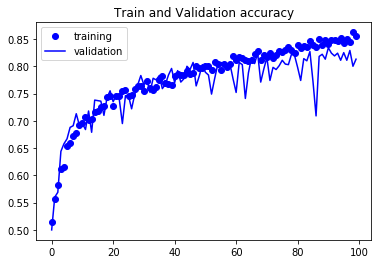

In [27]:
plt.plot(history.history['acc'], 'bo', label='training')
plt.plot(history.history['val_acc'], 'b', label='validation')
plt.title('Train and Validation accuracy')
plt.legend()
plt.show()

## Use pre-trained model

In [28]:
from keras.applications import VGG16

conv_base = VGG16(include_top=False, input_shape=(150,150,3), weights='imagenet')

58892288/58889256 [==============================] - 4s 0us/step


In [29]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [34]:
import numpy as np
datagen = ImageDataGenerator(rescale=1/255.)
batch_size = 20

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4 , 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), 
                                            batch_size= batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [38]:
model = Sequential()
#model.add(layers.Flatten(input_shape=(4,4,512)))
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=rmsprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [39]:
history = model.fit(train_features, train_labels, batch_size=20, epochs=30,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 503us/step - loss: 0.6268 - acc: 0.6460 - val_loss: 0.4554 - val_acc: 0.8140
Epoch 2/30
2000/2000 [==============================] - 1s 290us/step - loss: 0.4303 - acc: 0.8010 - val_loss: 0.3744 - val_acc: 0.8560
Epoch 3/30
2000/2000 [==============================] - 1s 282us/step - loss: 0.3533 - acc: 0.8470 - val_loss: 0.3290 - val_acc: 0.8550
Epoch 4/30
2000/2000 [==============================] - 1s 280us/step - loss: 0.3212 - acc: 0.8640 - val_loss: 0.3053 - val_acc: 0.8730
Epoch 5/30
2000/2000 [==============================] - 1s 281us/step - loss: 0.2814 - acc: 0.8865 - val_loss: 0.2868 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 1s 282us/step - loss: 0.2676 - acc: 0.8920 - val_loss: 0.2778 - val_acc: 0.8920
Epoch 7/30
2000/2000 [==============================] - 1s 281us/step - loss: 0.2361 - acc: 0.9070 - val_loss: 0.2684 - val_acc: 0.8950


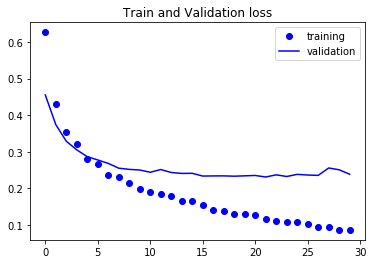

In [40]:
plt.plot(history.history['loss'], 'bo', label='training')
plt.plot(history.history['val_loss'], 'b', label='validation')
plt.title('Train and Validation loss')
plt.legend()
plt.show()

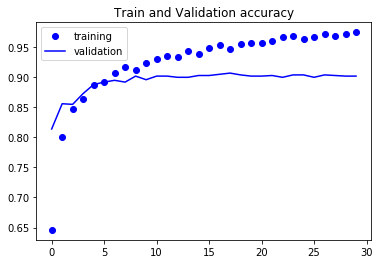

In [41]:
plt.plot(history.history['acc'], 'bo', label='training')
plt.plot(history.history['val_acc'], 'b', label='validation')
plt.title('Train and Validation accuracy')
plt.legend()
plt.show()

## Feature extraction with data augmentation

In [18]:
from keras.preprocessing.image import ImageDataGenerator 
import os, shutil
from keras import layers
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

original_dataset_dir = "../data/cat_vs_dog/train/"
base_dir = "small_cats_vs_dogs"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [19]:
from keras.applications import VGG16

conv_base = VGG16(include_top=False, input_shape=(150,150,3), weights='imagenet')

In [27]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
train_data_gen = ImageDataGenerator(rescale=1./255, 
                                    rotation_range=40, 
                                    width_shift_range=0.2, 
                                    height_shift_range=0.2, 
                                    shear_range=0.2, 
                                    zoom_range=0.2, 
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(train_dir, 
                                                     target_size=(150,150),
                                                     batch_size=20, 
                                                     class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(validation_dir, 
                                                         target_size=(150,150),
                                                         batch_size=20, 
                                                         class_mode='binary')
conv_base.trainable = False

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


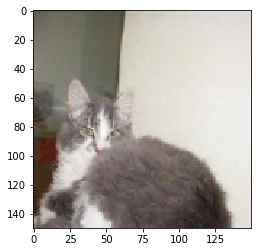

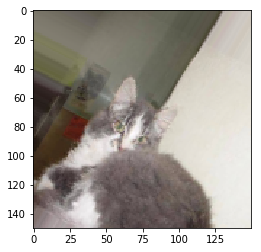

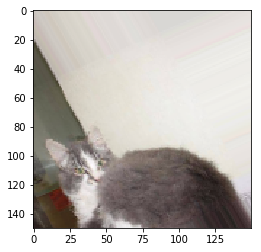

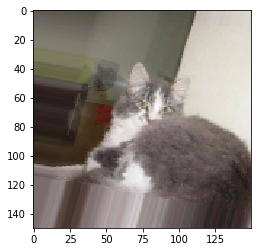

In [23]:
from keras.preprocessing import image
train_cats_dir = os.path.join(train_dir, 'cats')
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in train_data_gen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4==0:
        break
plt.show()

In [29]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                    validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 27s 273ms/step - loss: 0.5985 - acc: 0.6810 - val_loss: 0.4511 - val_acc: 0.8230
Epoch 2/30
100/100 [==============================] - 25s 249ms/step - loss: 0.4909 - acc: 0.7785 - val_loss: 0.3709 - val_acc: 0.8610
Epoch 3/30
100/100 [==============================] - 25s 252ms/step - loss: 0.4500 - acc: 0.7955 - val_loss: 0.3330 - val_acc: 0.8740
Epoch 4/30
100/100 [==============================] - 25s 249ms/step - loss: 0.4145 - acc: 0.8115 - val_loss: 0.3118 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 25s 250ms/step - loss: 0.3927 - acc: 0.8245 - val_loss: 0.2965 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 25s 249ms/step - loss: 0.3708 - acc: 0.8420 - val_loss: 0.2889 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 25s 250ms/step - loss: 0.3684 - acc: 0.8335 - val_loss: 0.2814 - val_acc: 0.8790
Epoch 8/30
100/100 [==============================] - 2

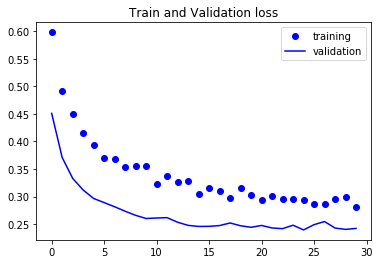

In [30]:
plt.plot(history.history['loss'], 'bo', label='training')
plt.plot(history.history['val_loss'], 'b', label='validation')
plt.title('Train and Validation loss')
plt.legend()
plt.show()

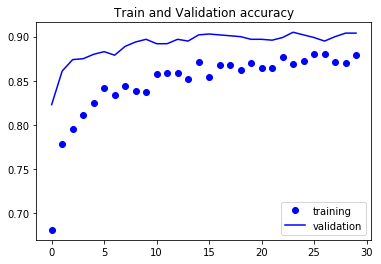

In [31]:
plt.plot(history.history['acc'], 'bo', label='training')
plt.plot(history.history['val_acc'], 'b', label='validation')
plt.title('Train and Validation accuracy')
plt.legend()
plt.show()

## Fine tuning

In [34]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [32]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name.startswith('block5'):
        layer.trainable = True
    else:
        layer.trainable = False

In [33]:
len(model.trainable_weights)

10

In [37]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100,
                              validation_data= validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 27s 275ms/step - loss: 0.2956 - acc: 0.8680 - val_loss: 0.2223 - val_acc: 0.9170
Epoch 2/100
100/100 [==============================] - 25s 252ms/step - loss: 0.2631 - acc: 0.8840 - val_loss: 0.2529 - val_acc: 0.9000
Epoch 3/100
100/100 [==============================] - 25s 254ms/step - loss: 0.2359 - acc: 0.9045 - val_loss: 0.2043 - val_acc: 0.9210
Epoch 4/100
100/100 [==============================] - 25s 253ms/step - loss: 0.2167 - acc: 0.9090 - val_loss: 0.2044 - val_acc: 0.9250
Epoch 5/100
100/100 [==============================] - 25s 254ms/step - loss: 0.2186 - acc: 0.9065 - val_loss: 0.2322 - val_acc: 0.9170
Epoch 6/100
100/100 [==============================] - 26s 255ms/step - loss: 0.1873 - acc: 0.9305 - val_loss: 0.1934 - val_acc: 0.9310
Epoch 7/100
100/100 [==============================] - 26s 255ms/step - loss: 0.1929 - acc: 0.9255 - val_loss: 0.2111 - val_acc: 0.9200
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 26s 255ms/step - loss: 0.0381 - acc: 0.9840 - val_loss: 0.2579 - val_acc: 0.9380
Epoch 62/100
100/100 [==============================] - 25s 253ms/step - loss: 0.0369 - acc: 0.9845 - val_loss: 0.2440 - val_acc: 0.9410
Epoch 63/100
100/100 [==============================] - 26s 256ms/step - loss: 0.0290 - acc: 0.9895 - val_loss: 0.2534 - val_acc: 0.9400
Epoch 64/100
100/100 [==============================] - 25s 254ms/step - loss: 0.0312 - acc: 0.9915 - val_loss: 0.2793 - val_acc: 0.9360
Epoch 65/100
100/100 [==============================] - 25s 255ms/step - loss: 0.0274 - acc: 0.9885 - val_loss: 0.2093 - val_acc: 0.9430
Epoch 66/100
100/100 [==============================] - 25s 254ms/step - loss: 0.0201 - acc: 0.9925 - val_loss: 0.3243 - val_acc: 0.9310
Epoch 67/100
100/100 [==============================] - 25s 255ms/step - loss: 0.0260 - acc: 0.9885 - val_loss: 0.2854 - val_acc: 0.9330
Epoch 68/100
100/100 [===================

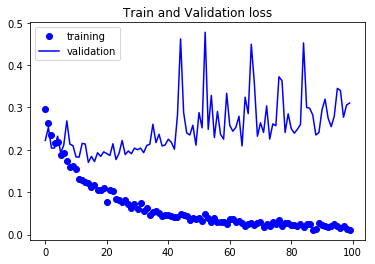

In [38]:
plt.plot(history.history['loss'], 'bo', label='training')
plt.plot(history.history['val_loss'], 'b', label='validation')
plt.title('Train and Validation loss')
plt.legend()
plt.show()

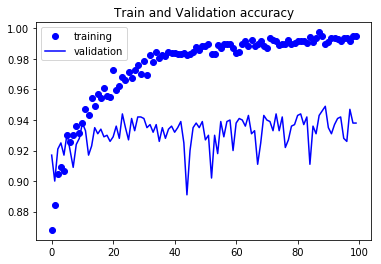

In [39]:
plt.plot(history.history['acc'], 'bo', label='training')
plt.plot(history.history['val_acc'], 'b', label='validation')
plt.title('Train and Validation accuracy')
plt.legend()
plt.show()

In [40]:
test_generator = test_data_gen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

Found 1000 images belonging to 2 classes.


In [41]:
test_loss

0.3141445730236956

In [42]:
test_acc

0.9459999918937683